#  Regression (kNN and Linear) against a single feature

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns #sets up styles and gives us more plotting options

In [2]:
dfcars=pd.read_csv("data/mtcars-cleaned.csv")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Numpy indexing and the train-test split

We can use range to construct an object which represents the list of numbers between 0 and some N. This is done as `range(N)`.

In [3]:
length_dataframe = dfcars.shape[0]
range(length_dataframe)

range(0, 32)

The range can be materialized by running the `list` constructor over it. Why do it this way? Suppose you wanted range(million). You dont want to store million numbers in memory when you can always generate the next one by adding 1 to the previous one:

In [4]:
list(range(length_dataframe))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

Lets use `range` in the construction of training and test sets. Recall that we split our data into training and test sets so that we can evaluate our model on the test set. The diagram below illustrates a situation in which we split our dataset 80% training, with the remaining 20% testing.

![](images/train-test.png)

Our general strategy is to do this randomly. `sklearn` gives us an easy to use function for this purpose. Notice that we split the range, which then leads to a materialization into lists of indices

In [5]:
from sklearn.model_selection import train_test_split
split = train_test_split(range(length_dataframe), train_size=0.8)

In [6]:
split

[[23,
  11,
  5,
  20,
  30,
  9,
  17,
  0,
  24,
  26,
  3,
  29,
  18,
  31,
  6,
  16,
  13,
  19,
  10,
  12,
  27,
  2,
  7,
  25,
  8],
 [28, 15, 4, 22, 21, 14, 1]]

Lets assign index lists to each member of the split:

In [7]:
i_train, i_test = split
i_train

[23,
 11,
 5,
 20,
 30,
 9,
 17,
 0,
 24,
 26,
 3,
 29,
 18,
 31,
 6,
 16,
 13,
 19,
 10,
 12,
 27,
 2,
 7,
 25,
 8]

In another way of picking certain "rows" from a dataframe, we can use this list of indices to pick up a bunch or car weights for the training set

In [8]:
dfcars.wt[i_train]

23    3.840
11    4.070
5     3.460
20    2.465
30    3.570
9     3.440
17    2.200
0     2.620
24    3.845
26    2.140
3     3.215
29    2.770
18    1.615
31    2.780
6     3.570
16    5.345
13    3.780
19    1.835
10    3.440
12    3.730
27    1.513
2     2.320
7     3.190
25    1.935
8     3.150
Name: wt, dtype: float64

Notice that this does not work for the entire dataframe!

In [9]:
dfcars[i_train]

KeyError: '[23 11  5 20 30  9 17  0 24 26  3 29 18 31  6 16 13 19 10 12 27  2  7 25  8] not in index'

This is because the fundamental model in indexing dataframes refers to coluns, not rows. To make this work in dataframes we use `iloc`

In [10]:
dfcars.iloc[i_train]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


## Creating features for regression

Our next job is to create the weight feature training set for our regression. We can use the Pandas series or the corresponding numpy array. The example below uses the numpy array

In [12]:
xtrain = dfcars.wt.values[i_train]
xtrain

array([ 3.84 ,  4.07 ,  3.46 ,  2.465,  3.57 ,  3.44 ,  2.2  ,  2.62 ,
        3.845,  2.14 ,  3.215,  2.77 ,  1.615,  2.78 ,  3.57 ,  5.345,
        3.78 ,  1.835,  3.44 ,  3.73 ,  1.513,  2.32 ,  3.19 ,  1.935,
        3.15 ])

> YOUR TURN NOW

>Create the test set of car weights in the variable `xtest`.

In [13]:
# your code here
xtest = dfcars.wt.values[i_test]
xtest

array([ 3.17 ,  5.424,  3.44 ,  3.435,  3.52 ,  5.25 ,  2.875])

In [14]:
ytrain = dfcars.mpg.values[i_train]
ytest = dfcars.mpg.values[i_test]

## The shape of things in scikit-learn

Scikit-learn is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as train_test_split. It can be used in python by the incantation import sklearn.

The library has a very well defined interface. This makes the library a joy to use, and surely contributes to its popularity. As the scikit-learn API paper [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).] says:

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data. The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.


Lets see the structure of scikit-learn needed to make these fits. `.fit` always takes two arguments:

`estimator.fit(Xtrain, ytrain)`.

Critically, `Xtrain` must be in the form of an array of arrays, with the inner array each corresponding to one sample, and whose elements correspond to the feature values for that sample. 

The `ytrain` on the other hand is a simple array of responses..continuous for regression problems.




![](images/sklearn2.jpg)

Let us see what our shapes look like:

In [15]:
xtrain.shape

(25,)

This is not what we want. We have 25 samples, but we want the data to look like a list of 25 feature vextors (each of size 1 here). So we must *reshape*.

In [16]:
Xtrain = xtrain.reshape(xtrain.shape[0], 1)
Xtrain

array([[ 3.84 ],
       [ 4.07 ],
       [ 3.46 ],
       [ 2.465],
       [ 3.57 ],
       [ 3.44 ],
       [ 2.2  ],
       [ 2.62 ],
       [ 3.845],
       [ 2.14 ],
       [ 3.215],
       [ 2.77 ],
       [ 1.615],
       [ 2.78 ],
       [ 3.57 ],
       [ 5.345],
       [ 3.78 ],
       [ 1.835],
       [ 3.44 ],
       [ 3.73 ],
       [ 1.513],
       [ 2.32 ],
       [ 3.19 ],
       [ 1.935],
       [ 3.15 ]])

In [17]:
Xtrain.shape

(25, 1)

Notice our notation: we started with the vector `xtrain`, a vectore of length 25 (shape (25,)) and comstructed a **design matrix**   `Xtrain` of size 25 x 1. We use CAPS for the first letter to remind ourselves of this.

In [18]:
ytrain.shape

(25,)

`ytrain` is expected to be a vector. 

> YOUR TURN NOW

> Let us also reshape `xtest` into `Xtest`

In [19]:
# your code here
Xtest = xtest.reshape(xtest.shape[0], 1)

### Regress

In [20]:
#import linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

At this point we have fit our model using the `fit` API method in sklearn. Now comes the next critical method, `predict`. The test set `Xtest` has the same structure as `Xtrain`, and is used in the `.predict` interface. Once we have fit the estimator, we predict the results on the test set by:

`estimator.predict(Xtest)`.

The results of this are a simple array of predictions, of the same form and shape as `ytest`.

In [21]:
#predict y-values
predicted_y = regression.predict(Xtest)

sklearn will now provide you with a default way to score your model, which for regression problems is $R^2$

In [22]:
#score predictions (sklearn gives you R^2 as well)
r2 = regression.score(Xtest, ytest)
r2

0.36203536907887829

> YOUR TURN NOW

> Dind the $R^2$ on the training set. Is it better or worse?

In [23]:
#your turn now
regression.score(Xtrain, ytrain)

0.72896884512573523

We can also access the mean squared error:

In [24]:
mean_squared_error(predicted_y, ytest)

8.4182687971628347

> YOUR TURN NOW

>Plot the predicted y against the actual y to see how we did. Ideally we'd want to be on the 45 degree line between predicted y ans actual y. In general we'll want the test set data to be distributed around this line

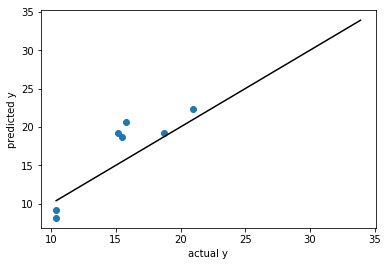

In [25]:
# your code here
plt.plot(ytest, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
plt.plot(grid, grid, color="black") # 45 degree line
plt.xlabel("actual y")
plt.ylabel("predicted y");

We can also predict the results on a grid of x's to draw the regression line. This is akin to treating the grid like a test set, but not quite, because the grid may contain points from the training set.

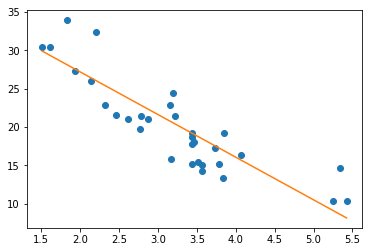

In [26]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
plt.plot(xgrid, regression.predict(xgrid.reshape(100, 1)));

## Nearest Neighbor regression

Now that we know the sklearn API, lets repeat the above for nearest neighbor regression with 5 neighbors

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [28]:
knnreg.fit(Xtrain, ytrain)
r2 = knnreg.score(Xtest, ytest)
r2

-0.023512635714064478

> YOUR TURN NOW

> How do we do on the training set?

In [29]:
# your code here
knnreg.score(Xtrain, ytrain)

0.83444280818405414

Lets vary the number of neighbors and see what we get

In [30]:
regdict = {}
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    regdict[k] = knnreg

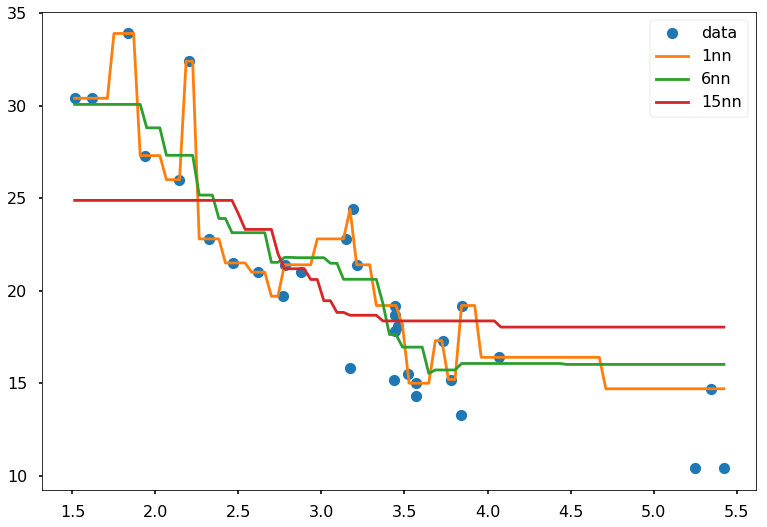

In [31]:
with sns.plotting_context('poster'):
    plt.plot(dfcars.wt, dfcars.mpg, 'o', label="data")
    xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
    for k in [1, 2, 6,  10, 15]:
        predictions = regdict[k].predict(xgrid.reshape(100,1))
        if k in [1, 6, 15]:
            plt.plot(xgrid, predictions, label="{}nn".format(k))
    plt.legend();

Notice how the 1NN goes through every point on the training set but utterly fails elsewhere. Lets look at the scores on the training set

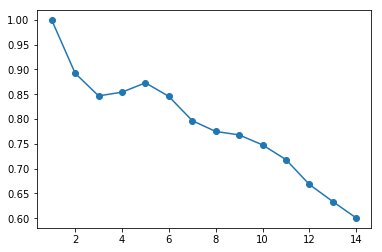

In [65]:
ks = range(1, 15)
scores_train = []
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    score_train = knnreg.score(Xtrain, ytrain)
    scores_train.append(score_train)
plt.plot(ks, scores_train,'o-');

Why do we get a perfect $R^2$ at k=1?

> YOUR TURN NOW

> Make the same plot on the test set:

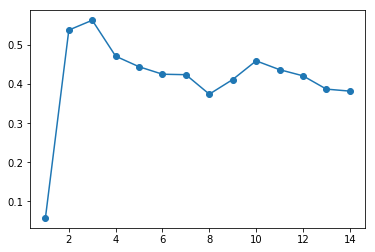

In [66]:
# your code here
ks = range(1, 15)
scores = []
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    score = knnreg.score(Xtest, ytest)
    scores.append(score)
plt.plot(ks, scores,'o-');

What is the best k?